<a href="https://colab.research.google.com/github/ravi-prakash1907/Machine-Learning-for-Cyber-Security/blob/main/Labs/deepNN_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## lib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils as np_utils
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

import numpy as np
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib
print(tf.__version__)

2.5.0


In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [ ]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [ ]:
def preprocess_img(imgs):
  sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
  assert sample_img.shape in [(28,28,1), (28,28)], sample_img.shape
  return imgs / 255.0

train_images = preprocess_img(train_images)
test_images = preprocess_img(test_images)

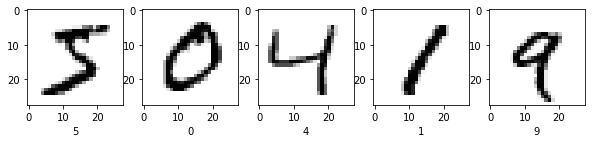

In [ ]:
plt.figure(figsize=(10,2))
for i in range (5):
  plt.subplot(1,5,i+1)
  plt.xticks()
  plt.yticks()
  plt.grid(False)
  plt.imshow(train_images[i].reshape(28,28),cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

In [ ]:
model = keras.Sequential()
## 32 convolution filters used with 3x3 each
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
## 64 convol.. filters used each of size 3x
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
## 
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
            loss='sparse_catagorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


ValueError: ignored

In [ ]:
print(test_images.shape)
test_loss, test_acc =model.evaluate(test_images, test_labels)

print("Test accuracy: ",test_acc)

(10000, 28, 28, 1)


ValueError: ignored